In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
%matplotlib inline

In [58]:
data = pd.read_csv("C:/Users/srika/Documents/PythonScripts/heroes_information.csv", index_col = False)


In [59]:
data.head()


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [60]:
data.dtypes

Unnamed: 0      int64
name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [61]:
data["Height"] = abs(data['Height'])
data["Weight"] = abs(data["Weight"])
data.drop("Unnamed: 0", axis=1, inplace=True)
data.dropna(axis=0, inplace=True)
data.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,99.0


In [62]:
data["Gender"].replace("-", "Non-Gender", inplace=True)
data["Gender"].unique()



array(['Male', 'Female', 'Non-Gender'], dtype=object)

Text(0.5, 1.0, 'Count of Marvel Character Genders')

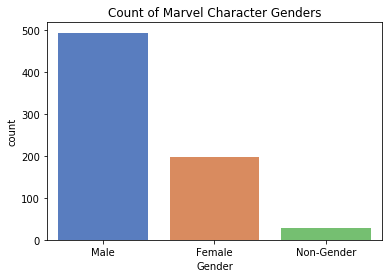

In [63]:
ax = sns.countplot(x="Gender", data=data, palette = "muted")
ax.set_title("Count of Marvel Character Genders")


In [64]:
data["Alignment"].replace("-", "neutral", inplace=True)

male = data.loc[data["Gender"] == "Male",]
female = data.loc[data["Gender"] == "Female",]
non_gen = data.loc[data["Gender"] == "Non-Gender",]


Text(0.5, 1.0, 'Alignment of Male Characters')

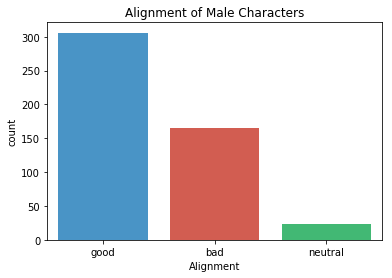

In [65]:
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
g = sns.countplot(data=male, x="Alignment", palette=sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"]))
g.set_title("Alignment of Male Characters")

Text(0.5, 1.0, 'Alignment of Female Characters')

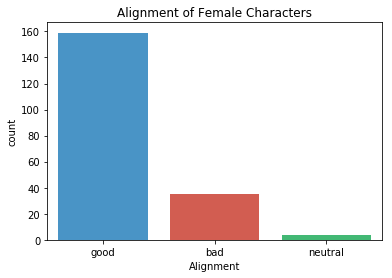

In [66]:
g = sns.countplot(data=female, x="Alignment", palette=sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"]))
g.set_title("Alignment of Female Characters")

Text(0.5, 1.0, 'Alignment of Non-Gendered Characters')

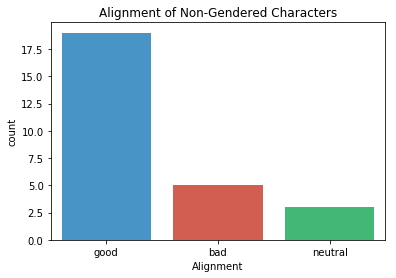

In [67]:
g = sns.countplot(data=non_gen, x="Alignment", palette=sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"]))
g.set_title("Alignment of Non-Gendered Characters")

In [68]:
no_hair = data.loc[data["Hair color"] == "No Hair", ]
no_hair.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0


Text(0.5, 1.0, 'Alignment of Comic Characters without Hair')

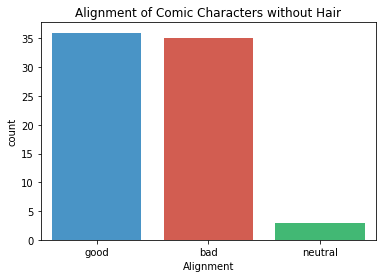

In [69]:
g = sns.countplot(data=no_hair, x="Alignment", palette=sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"]))
g.set_title("Alignment of Comic Characters without Hair")

In [70]:
(data["Race"].unique())

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic', 'Human / Altered',
       'Kryptonian', 'Kakarantharaian', 'Zen-Whoberian', 'Strontian',
       'Saiyan', 'Gorilla', 'Rodian', 'Flora Colossus', 'Human-Vuldarian',
       'Asgardian', 'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian',
       'Animal', 'Czarnian', 'Martian', 'Spartoi', 'Planet', 'Luphomoid',
       'Parademon', 'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran',
       'Zombie', 'Human-Vulcan', 'Human-Spartoi', 'Tamaranean',
       'Frost Giant', 'Mutant / Clone', "Yoda's species"], dtype=object)

In [71]:
evil = data.loc[data["Alignment"] == "bad", ]
good = data.loc[data["Alignment"] == "good", ]
neutral = data.loc[data["Alignment"] == "neutral", ]


Text(0.5, 1.0, 'Height Distribution of Evil Characters by Alignment')

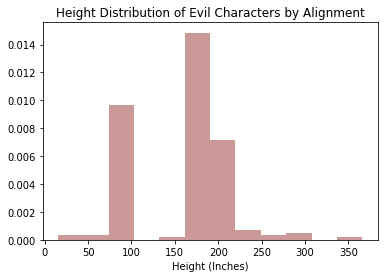

In [72]:
g = sns.distplot(evil["Height"], kde=False, norm_hist=True, color="maroon", axlabel="Height (Inches)")
g.set_title("Height Distribution of Evil Characters by Alignment")

In [73]:
good = good.loc[good["Height"] < 500, ]

(0, 400)

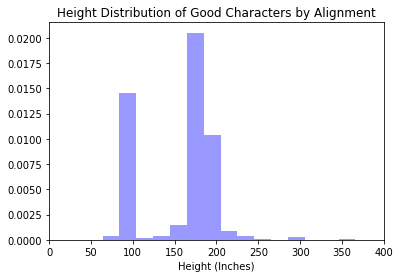

In [74]:

g = sns.distplot(good["Height"], kde=False, norm_hist=True, color="b", axlabel="Height (Inches)")
g.set_title("Height Distribution of Good Characters by Alignment")
plt.xlim(0, 400, 50)

(0, 400)

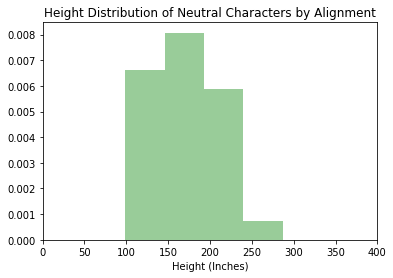

In [75]:
neutral = neutral.loc[neutral["Height"] < 500,]
g = sns.distplot(neutral["Height"], kde=False, norm_hist=True, color="g", axlabel="Height (Inches)")
g.set_title("Height Distribution of Neutral Characters by Alignment")
plt.xlim(0, 400, 50)

Text(0.5, 1.0, 'Height Distribution for all Characters')

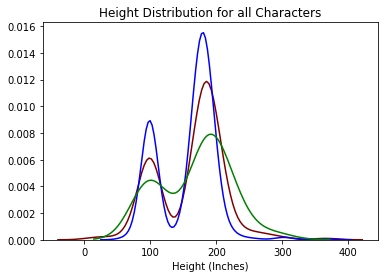

In [76]:
g1 = sns.distplot(evil["Height"], kde=True, hist = False, color="maroon", axlabel="Height (Inches)")
g2 = sns.distplot(good["Height"], kde=True, hist = False, color="b", axlabel="Height (Inches)")
g3 = sns.distplot(neutral["Height"], kde=True, hist = False, color="g", axlabel="Height (Inches)")
g1.set_title("Height Distribution for all Characters")


Text(0.5, 1.0, 'Weight Distribution of Evil Characters by Alignment')

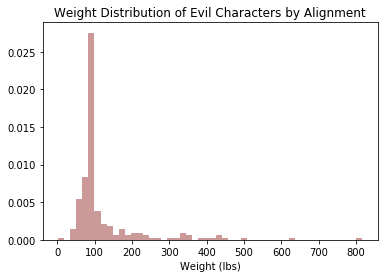

In [77]:
g = sns.distplot(evil["Weight"], kde=False, norm_hist=True, color="maroon", axlabel="Weight (lbs)")
g.set_title("Weight Distribution of Evil Characters by Alignment")

Text(0.5, 1.0, 'Weight Distribution of Good Characters by Alignment')

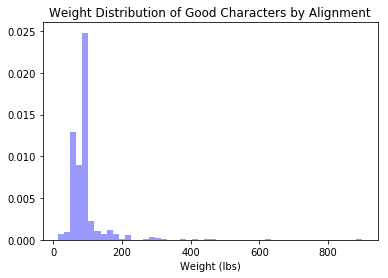

In [78]:
g = sns.distplot(good["Weight"], kde=False, norm_hist=True, color="b", axlabel="Weight (lbs)")
g.set_title("Weight Distribution of Good Characters by Alignment")

Text(0.5, 1.0, 'Weight Distribution of Neutral Characters by Alignment')

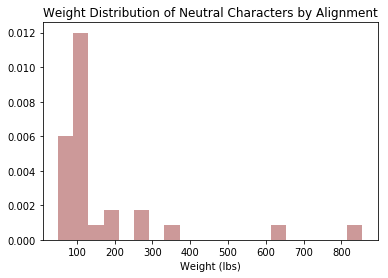

In [79]:
g = sns.distplot(neutral["Weight"], kde=False, norm_hist=True, color="maroon", axlabel="Weight (lbs)")
g.set_title("Weight Distribution of Neutral Characters by Alignment")

In [80]:
good = good.loc[good["Weight" ] < 500,]
evil = evil.loc[evil["Weight"] < 500,]
neutral = neutral.loc[neutral["Weight"] < 500, ]

Text(0.5, 1.0, 'Weight Distribution for all Characters')

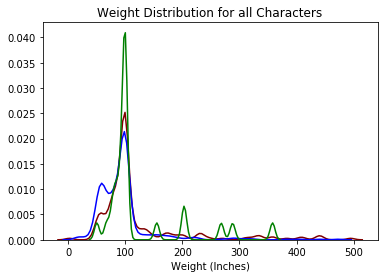

In [81]:
g1 = sns.distplot(evil["Weight"], kde=True, hist = False, color="maroon", axlabel="Weight (Inches)")
g2 = sns.distplot(good["Weight"], kde=True, hist = False, color="b", axlabel="Weight (Inches)")
g3 = sns.distplot(neutral["Weight"], kde=True, hist = False, color="g", axlabel="Weight (Inches)")
g1.set_title("Weight Distribution for all Characters")

In [82]:
eyes = data.loc[data["Eye color"] != "-", ]
eyes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,99.0


In [83]:
eyes["Eye color"].value_counts()
most_common_eye_colors = ["blue", "brown", "green", "red", "black", "yellow", "white", "grey", "hazel", "purple"]
most_common_eyes = eyes[eyes["Eye color"].isin(most_common_eye_colors)]



most_common_eyes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,99.0


[Text(0, 0.5, 'Count of Eye Color'), Text(0.5, 0, 'Eye Color')]

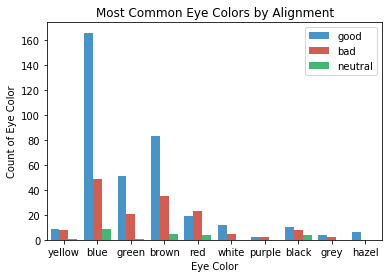

In [84]:
g = sns.countplot(data=most_common_eyes, x = "Eye color", hue = "Alignment", palette= sns.color_palette(["#3498db", "#e74c3c", "#2ecc71"]))
g.set_title("Most Common Eye Colors by Alignment")
plt.legend(loc = "upper right")
g.set(xlabel = "Eye Color", ylabel = "Count of Eye Color")

In [85]:
non_humans = data.loc[(data["Race"] != "Human") & (data["Race"] != "-"), ]
non_humans.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,99.0
12,Ajax,Male,brown,Cyborg,Black,193.0,Marvel Comics,-,bad,90.0


[Text(0, 0.5, 'Distribution'), Text(0.5, 0, 'Height (Inches)')]

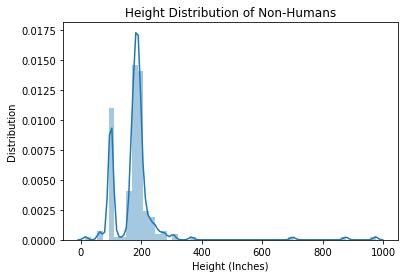

In [86]:
g = sns.distplot(non_humans["Height"], kde=True)
g.set_title("Height Distribution of Non-Humans")
g.set(xlabel = "Height (Inches)", ylabel = "Distribution")

[Text(0, 0.5, 'Distribution'), Text(0.5, 0, 'Weight (lbs)')]

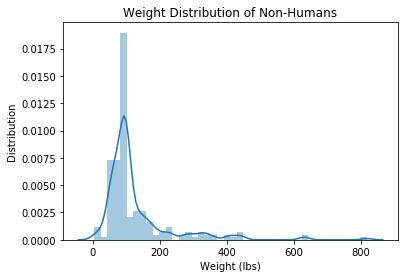

In [87]:
g = sns.distplot(non_humans["Weight"], kde=True)
g.set_title("Weight Distribution of Non-Humans")
g.set(xlabel = "Weight (lbs)", ylabel = "Distribution")

Text(0.5, 1.0, 'Alignment of Non-Humans by Gender')

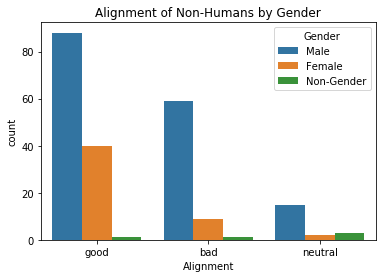

In [88]:
g = sns.countplot(data = non_humans, x = "Alignment", hue="Gender")
g.set_title("Alignment of Non-Humans by Gender")

Text(0.5, 1.0, 'Percentages of Characters owned by Top 8 Publishers')

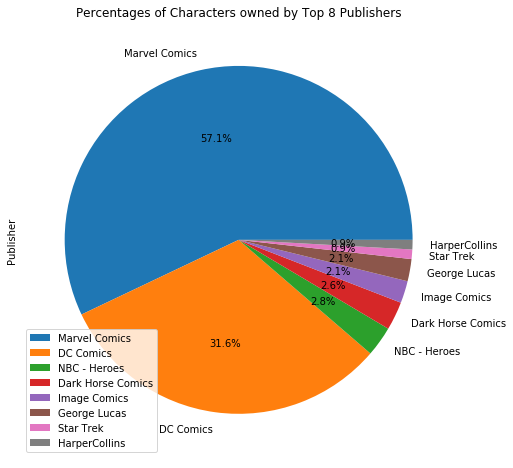

In [89]:


publishers = pd.DataFrame(data["Publisher"].value_counts(normalize=True)*100)
publishers[:8].plot.pie(y="Publisher", figsize=(8, 8), autopct='%1.1f%%')
plt.legend(loc = "lower left")
plt.title("Percentages of Characters owned by Top 8 Publishers")

In [103]:
powers = pd.read_csv("C:/Users/srika/Documents/PythonScripts/super_hero_powers.csv", index_col = False)
powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
powers.rename(columns = {"hero_names": "name"}, inplace=True)
powers.head()
powers_columns = list(powers)
powers

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
superhero = pd.merge(data, powers, on="name", how="outer")
superhero.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,99.0,Marvel Comics,-,bad,99.0,...,False,False,False,False,False,False,False,False,False,False


In [106]:

powers = superhero.loc[:, superhero.columns.isin(powers_columns)]
powers = powers * 1
powers.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abomination,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abraxas,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
powers_t = powers.set_index("name").T
powers_t["Count"] = powers_t.sum(axis=1, skipna=True)
powers_t.reset_index(inplace=True)
#powers_columns.append("Alignment")


In [109]:
powers_t.sort_values(by="Count", inplace=True, ascending=False)
powers_t.head()

name,index,A-Bomb,Abe Sapien,Abin Sur,Abomination,Abraxas,Absorbing Man,Adam Monroe,Adam Strange,Agent 13,...,Queen Hippolyta,Rambo,Reactron,SHDB,Stretch Armstrong,TEST,The Cape,Tommy Clarke,Tyrant,Count
17,Super Strength,1,1,0,1,1,1,0,0,NaN,...,1,0,0,0,0,0,0,0,1,372.0
25,Stamina,1,1,0,1,0,0,0,0,NaN,...,1,1,0,0,0,0,0,0,1,302.0
5,Durability,1,1,0,0,0,1,0,1,NaN,...,1,0,0,0,1,0,0,0,1,268.0
30,Super Speed,0,0,0,1,1,0,0,1,NaN,...,1,0,0,0,0,0,0,0,0,259.0
0,Agility,0,1,0,0,0,0,0,0,NaN,...,1,1,0,0,0,0,0,0,0,251.0


Text(0, 0.5, 'Count')

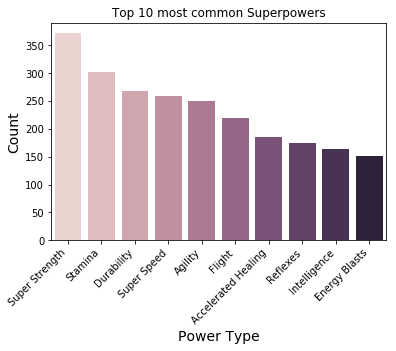

In [113]:
top_10_powers = powers_t.iloc[:10,]
g = sns.barplot(data=top_10_powers, x = "index", y = "Count", palette = sns.cubehelix_palette(10))
g.set_title("Top 10 most common Superpowers")
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha = "right")
g.set_xlabel("Power Type",fontsize=14)
g.set_ylabel("Count",fontsize=14)


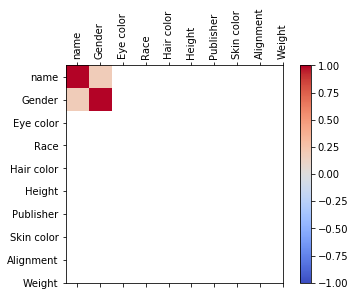

In [116]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()


In [170]:
superhero.dropna(axis=0, inplace=True)
enc = OneHotEncoder(handle_unknown='ignore')

x = superhero.iloc[:, 10:]
enc.fit_transform(x)
y = superhero.iloc[:, 8]

model = ExtraTreesClassifier()
model.fit(x, y)
model.feature_importances_


,Power,Importance
16,Intelligence,0.028088
8,Flight,0.026318
59,Reflexes,0.024024
21,Energy Blasts,0.023760
5,Durability,0.023297
0,Agility,0.021840
17,Super Strength,0.021379
25,Stamina,0.020714
12,Weapons Master,0.019201
1,Accelerated Healing,0.018583


In [178]:
features = [list(x)]
features.append(model.feature_importances_)
features = list(map(list, zip(*features))) #transpose list of lists
features = pd.DataFrame(features, columns = ["Power", "Importance"])
features.sort_values(by="Importance", ascending=False, inplace=True, axis=0)
top_features = features.loc[features["Importance"] > 0.01, ]
top_features = top_features.drop("Importance", axis=1)



In [195]:
column_vals = top_features["Power"]
column_vals = list(column_vals)


In [202]:
rf_x = x[column_vals]
rf_x.head()

,Intelligence,Flight,Reflexes,Energy Blasts,Durability,Agility,Super Strength,Stamina,Weapons Master,Accelerated Healing,...,Size Changing,Energy Absorption,Telekinesis,Enhanced Senses,Power Suit,Teleportation,Hypnokinesis,Animal Oriented Powers,Energy Manipulation,Magic
0,False,False,False,False,True,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,True,True


In [211]:
test_rf_x = x.iloc[:200, :]
test_y = y[:200, ]
train_rf_x = x.iloc[200:, :]
train_rf_y = y[200:, ]

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(train_rf_x, train_rf_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [221]:
pred_y = clf.predict(test_rf_x)


0         good
1         good
2         good
3          bad
4          bad
5          bad
6         good
7         good
9         good
10        good
11         bad
12         bad
13        good
14         bad
15        good
17         bad
18        good
19         bad
20         bad
21        good
22        good
23        good
24        good
25        good
26         bad
27        good
28         bad
29        good
30        good
31         bad
        ...   
191       good
193       good
195       good
196       good
197       good
198       good
199        bad
200       good
201        bad
202        bad
203       good
204       good
205       good
206       good
207    neutral
208        bad
209       good
210    neutral
211        bad
212        bad
213        bad
214       good
215       good
216        bad
217        bad
218       good
219        bad
220       good
221       good
222       good
Name: Alignment, Length: 200, dtype: object

In [223]:
accuracy_score(test_y, pred_y)  

0.66000000000000003

In [228]:
confusion_matrix(test_y, pred_y)

array([[  3,  59,   0],
       [  1, 129,   0],
       [  1,   7,   0]], dtype=int64)

C:\Users\srika\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


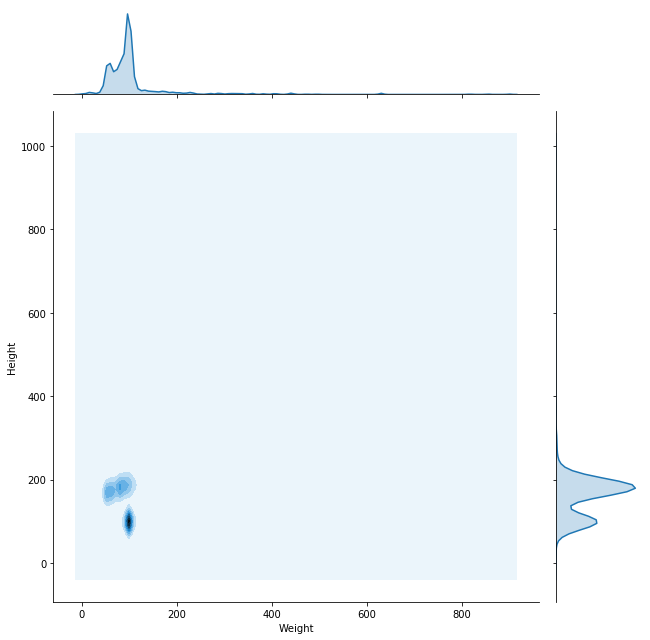

In [232]:
g  = sns.jointplot(x='Weight',y='Height',data=data,kind='kde',size=9)


(-0.5, 1439.5, 1079.5, -0.5)

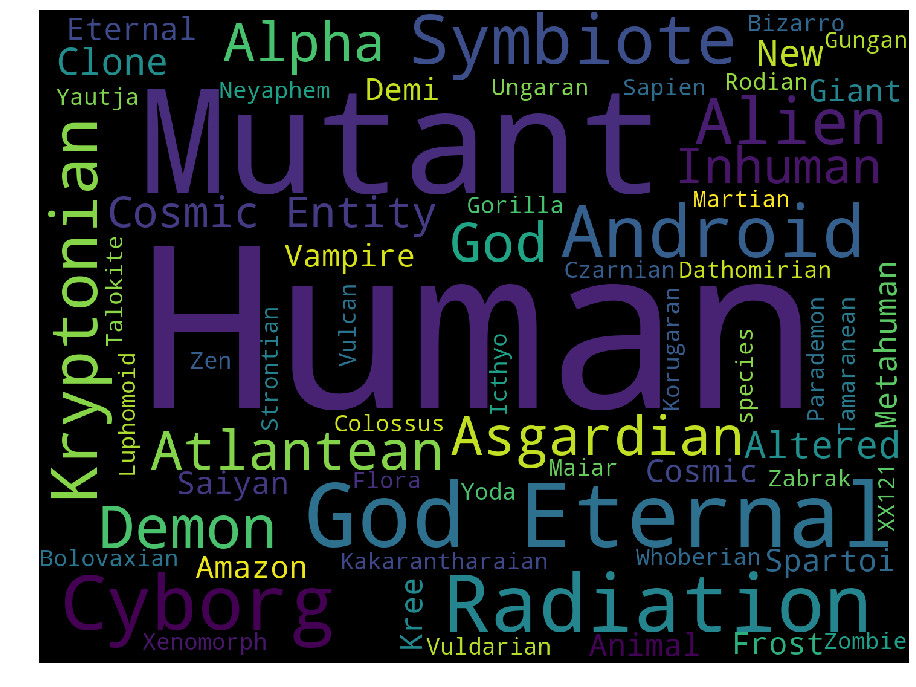

In [236]:
stopwords = stopwords.words('english')
cloud = WordCloud(width=1440, height=1080, stopwords=stopwords).generate(" ".join(superhero['Race'].dropna().astype(str)))
plt.figure(figsize=(20, 12))
plt.imshow(cloud)
plt.axis('off')